# Import libraries

In [10]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from sklearn.cluster import KMeans,AffinityPropagation
from scipy.spatial import distance
from constants import *
import matplotlib.pyplot as plt
import collections, operator
import random
warnings.filterwarnings("ignore")

### Helper Methods

In [11]:
def count_k_means(kmeans):
    """ Count number of points in each cluster
    kmeans: model
    return: None
    """
    print("K-means")
    counts = {}
    for idx,i in enumerate(kmeans.labels_):
        if(idx%2000==0):
            print("Point", idx, "belongs to cluster",i+1)
        if(i not in counts):
            counts[i]=1
        else:
            counts[i]+=1
    print("********************************************")
    print("********************************************")
    print("Counts of each cluster are")
    for i in range(0,len(counts)):
        print("Cluster",i+1,":",counts[i])

def compute_BIC(kmeans,X):
    """ Compute BIC for k-means clustering
    BIC = -2logL(theta)+log(N)*P, P: free parameters, N: data points
    Lower BIC indicates better fitting models
    For k-means, we use 
    BIC(C) = n*ln(J(C)/n) + k*ln(n)
    J is the Sum of squared distances of samples to their closest cluster center
    n is number of points
    k is number of clusters*parameters estimated
    """

    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape
    cl_var = (kmeans.inertia_)/N

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return BIC
        
def plot_elbow(list_k, X):
    """ Plot cost function 
    K: for each K in list_k
    X: dataset
    return: plot
    """
    list_score=[]
    for K in list_k:
        kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
        list_score.append(kmeans.inertia_)
    fig = plt.subplot(111)
    plt.plot(list_k, list_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('Elbow Analysis')
    plt.show()     
    
def plot_BIC(list_k, X):
    """ Plot BIC
    K: for each K in list_k
    X: dataset
    return: plot
    """
    list_score=[]
    for K in list_k:
        kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
        list_score.append(compute_BIC(kmeans,X))
    fig = plt.subplot(111)
    plt.plot(list_k, list_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show()   

### Exploratory Analysis

In [12]:
#Dataset

df_main = pd.read_csv('../Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log2(df_main.values)

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017


In [13]:
#Dataset
Z = np.zeros((len(df_main),5))
for i,array in enumerate(X):
    delta_1 = (array[1]-array[0])/array[0]
    delta_2 = (array[2]-array[1])/array[1]
    Z[i] = np.append(X[i], [delta_1,delta_2])

In [15]:
#Initial K-means with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [16]:
print(kmeans.cluster_centers_)

[[ 2.63581995  2.63258457  2.81455467]
 [ 5.99804468  6.18370591  6.07820929]
 [-0.3192375  -0.34808758 -0.14950861]
 [ 1.28438888  1.36283867  1.630316  ]
 [ 8.04956939  8.1955775   7.89362167]
 [ 4.73948912  4.87517925  4.87163278]
 [ 3.66041642  3.77344738  3.8851796 ]]


In [17]:
count_k_means(kmeans)

K-means
Point 0 belongs to cluster 1
Point 2000 belongs to cluster 2
Point 4000 belongs to cluster 6
Point 6000 belongs to cluster 5
Point 8000 belongs to cluster 7
Point 10000 belongs to cluster 7
********************************************
********************************************
Counts of each cluster are
Cluster 1 : 2362
Cluster 2 : 1355
Cluster 3 : 638
Cluster 4 : 1591
Cluster 5 : 407
Cluster 6 : 2131
Cluster 7 : 2603


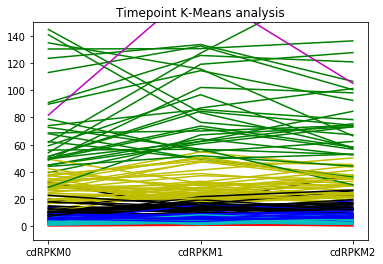

In [18]:
fig = plt.subplot(111)
colors = ['b','g','r','c','m','y','k']
var_plot_list = CDRPKM_LIST
for i in range(150):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[kmeans.labels_[i]])

plt.title("Timepoint K-Means analysis")
plt.ylim(-10, 150)
plt.show()

# Elbow analysis for 2<=K<=20

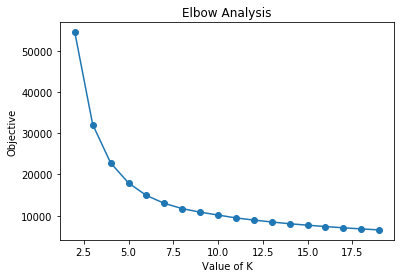

In [21]:
plot_elbow(list(range(2,20,1)),X)

# BIC analysis for 2<=K<=20

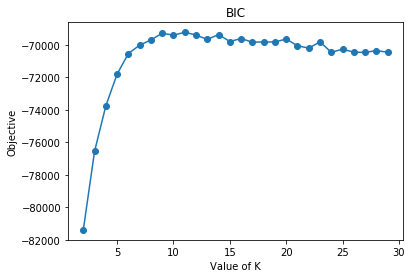

In [20]:
plot_BIC(list(range(2,30,1)),X)

# Affinity Propagation

In [ ]:
clustering = AffinityPropagation(max_iter=5000).fit(Z)
clustering.labels_

In [ ]:
len(clustering.cluster_centers_)